<a id='main'></a>

### Data & Folders
[Data &  Folders](#data_folders)

### Functions
[functions](#functions)

### Plots:
[plots](#plots)

In [1]:
import os
#from VPM_plotting import *
from VPM_plotting_parallel import *
from virusPropagationModel import *

import VPM_plotting as vpm_plot
import get_status_data_and_plots_from_parallel as plt_para
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from functools import partial

%matplotlib inline

defaultCmap = cm.get_cmap('Set2')
red_pur_Cmap = cm.get_cmap('PuRd')
reds_Cmap = cm.get_cmap('Reds')

confi_z_dict = { 99 : 2.576, 
                 98 : 2.326,
                 95 : 1.96,
                 90 : 1.645,}
#ci = z*sigma/sqrt(n)

<a id='data_folders'></a>
### Data &  Folders 
[back to top](#main)

In [3]:
server_data_folder_str = '/Volumes/Samsung_T5/corona_simulations/simulation_results_20201028/'
scenarios_list = os.listdir(server_data_folder_str)
scenarios_list.sort()

scenarios_list

['._plot_summary_all_scenarios.pptx',
 '.~lock.plot_summary_all_scenarios.pptx#',
 'LockDownLight',
 'base_scenario',
 'close_all_336',
 'close_public_home_office_scan_0.2_0.9',
 'close_public_inf_0.15',
 'disobedience_scan_0.00_0.45',
 'incidence_scan_LockDownLight',
 'incidence_scan_control',
 'infectivity_scan_0.025_0.500',
 'infectivity_scan_0.05_0.50',
 'infectivity_scan_0.100_0.500',
 'lockdown_start_scan_100_550',
 'mix_base_scenario',
 'mix_product_0.6',
 'modified_interaction_frequencies_Bad_Feilnbach',
 'modified_interaction_frequencies_Gangelt',
 'no_infections',
 'no_infections_mix',
 'plot_summary_all_scenarios.pptx',
 'product_0.6_scan_inf_0.075_1.200',
 'recover_fromWorld_scan_0.5_0.9',
 'recover_from_world_scan_0.5_0.9',
 'recover_interaction_scan_0.5_0.9',
 'recover_ordered1_0.5_0.9',
 'recover_pensioner_infectivity_0.15',
 'recover_random_scan_0.5_0.9',
 'recover_random_scan_0_1',
 'recover_schedule_type',
 'reopen_all_scan_500_1500',
 'reopen_all_scan_672_1344',
 're

<a id='functions'></a>
### Functions 
[back to top](#main)

In [3]:
def get_df_stat(folder_scenario,server_data_folder, stat='I'):
    assert stat in ['I','D','R','S'], stat+" not in ['I','D','R','S']"
    try:
        df_stat = pd.read_csv(server_data_folder + folder_scenario +
                         '/'+folder_scenario+'_'+stat+'.csv')
    except:
        try:
            df_stat = pd.read_csv(server_data_folder + folder_scenario +
                             '/IAR_1_0_99_'+folder_scenario[:-10]+'_'+stat+'.csv')
        except:
            print("can't read ", server_data_folder + folder_scenario +
                  '/'+folder_scenario+'_'+stat+'.csv')
    return(df_stat.drop('time', axis=1))

<a id='plots'></a>
# Plots
[back to top](#main)

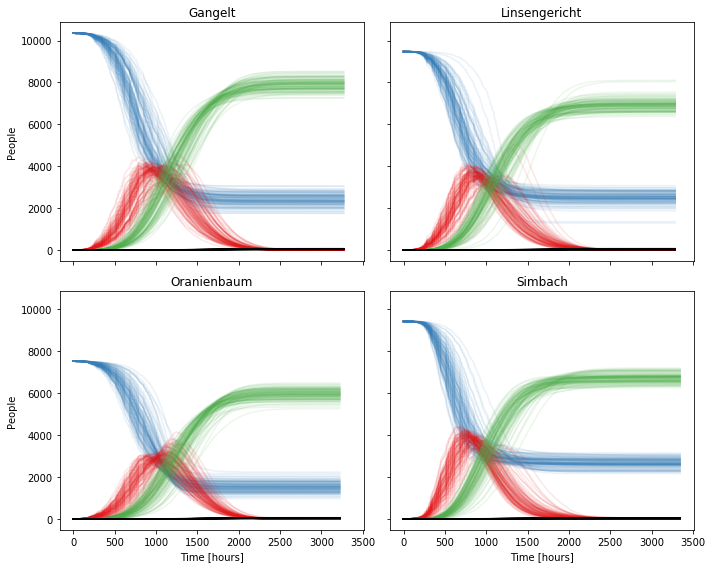

In [4]:
group_folder = 'incidence_scan_LockDownLight'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for k,s in enumerate(subfolder):
    #ax_series[k].plot()
    plot_stat_para(ax_series[k], s, data_folder)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()    

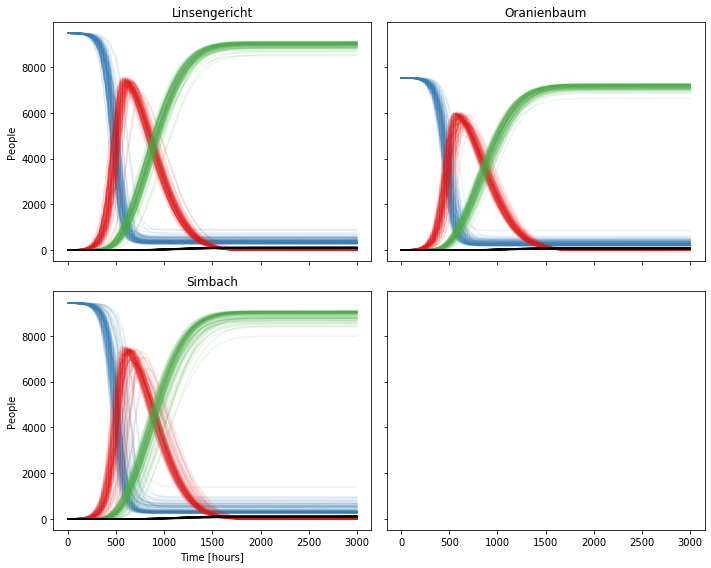

In [4]:
group_folder = 'incidence_scan_control'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for k,s in enumerate(subfolder):
    #ax_series[k].plot()
    plot_stat_para(ax_series[k], s, data_folder)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()    

#### statii with errors

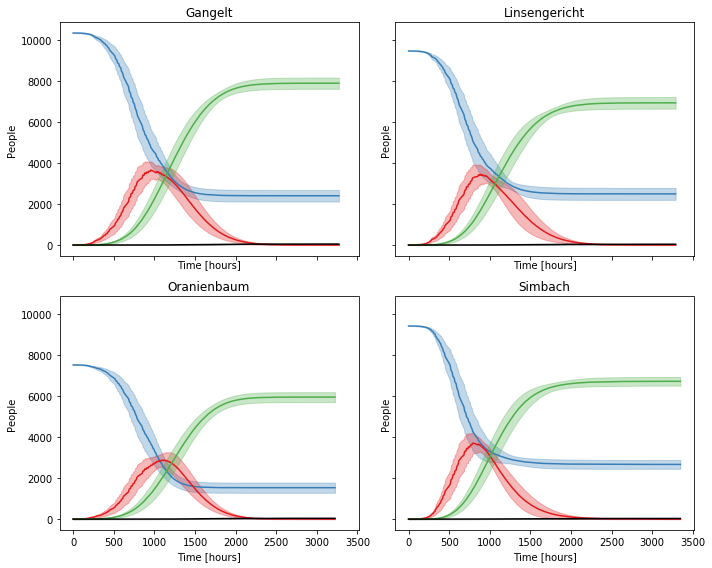

In [5]:
group_folder = 'incidence_scan_LockDownLight'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for k,s in enumerate(subfolder):
    #ax_series[k].plot()
    plot_stat_para_mean_error(ax_series[k], s, data_folder)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()    

## combined


In [11]:
group_folder_c = 'incidence_scan_control'
group_folder_ldl = 'incidence_scan_LockDownLight'
group_folders = ['incidence_scan_control','incidence_scan_LockDownLight']

<a id='infection'></a>
#### infection 
[back to top](#main)

In [9]:
len(df_I.columns)

NameError: name 'df_I' is not defined

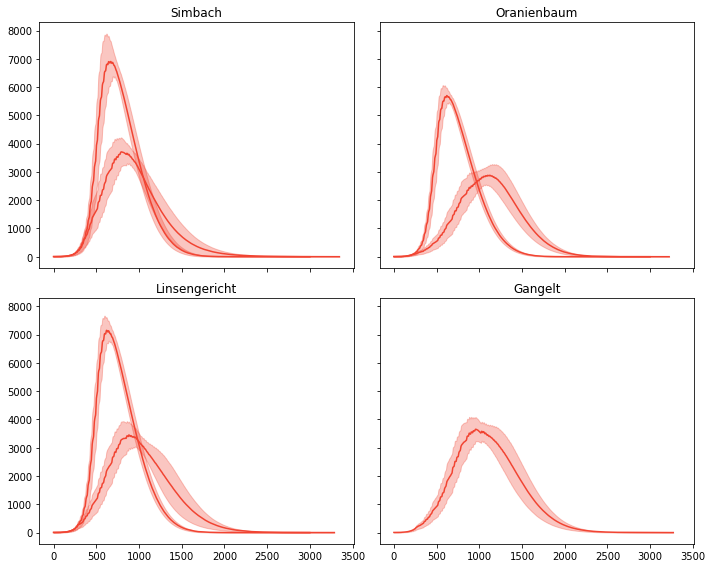

In [17]:
r1=reds_Cmap(0.6)
r2=reds_Cmap(1)

group_folder = 'incidence_scan_control'

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for group_folder in group_folders:
    
    data_folder = server_data_folder_str+group_folder +'/'
    subfolder = os.listdir(data_folder)
    subfolder.sort(reverse=True)
    
    for k,s in enumerate(subfolder):
        #data
        df_I = get_df_stat(s, data_folder,stat='I')
        df_I_m = df_I.mean(axis=1)
        df_I_std = df_I.std(axis=1)
        CI = confi_z_dict[99]*df_I_std.values/np.sqrt(len(df_I.columns))
        
        #plot
        ax_series[k].plot(df_I_m, color=r1)
        #ax_series[k].fill_between(df_I_m.index,df_I_m.values-CI,df_I_m.values+CI, color=r1, alpha=0.3)
        ax_series[k].fill_between(df_I_m.index,df_I_m.values-df_I_std,df_I_m.values+df_I_std, color=r1, alpha=0.3)
        ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()   

In [102]:
s.split('_')[0]

'Simbach'

In [99]:
df_R = get_df_stat(s, data_folder,stat='R')
df_S = get_df_stat(s, data_folder,stat='S')
df_I = get_df_stat(s, data_folder,stat='I')

r1=reds_Cmap(0.6)
r2=reds_Cmap(1)

In [73]:
np.sqrt(len(df_I.columns))
df_I_m

0       9425.00
1       9425.00
2       9425.00
3       9425.00
4       9425.00
         ...   
2995     412.04
2996     412.04
2997     412.04
2998     412.04
2999     412.04
Length: 3000, dtype: float64

Text(0, 0.5, 'Infected Agents')

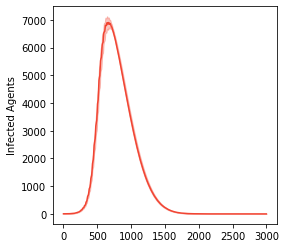

In [100]:
df_I_m = df_I.mean(axis=1)
df_I_st = df_I.std(axis=1)

fig, ax = plt.subplots(1,1,figsize=(4,4))
CI = confi_z_dict[99]*df_I_st.values/np.sqrt(len(df_I.columns))
ax.plot(df_I_m, color=r1)
ax.fill_between(df_I_m.index,df_I_m.values-CI,df_I_m.values+CI, color=r1, alpha=0.3)
ax.set_ylabel('Infected Agents')


In [95]:
df_R_m = df_R.iloc[-1].mean()
df_R_std = df_R.iloc[-1].std()
df_S_m = df_R.iloc[-1].mean()
df_S_std = df_R.iloc[-1].std()
reds_Cmap(0.4)

(0.9874509803921568, 0.5411764705882353, 0.41568627450980394, 1.0)